# Newton's method and nonlinear equations

In first-year calculus, most students learn [Newton's method](https://en.wikipedia.org/wiki/Newton's_method) for solving nonlinear equations $f(x) = 0$, which iteratively improves a sequence of guesses for the solution $x$ by **approximating f by a straight line**.   That is, it **approximates a *nonlinear* equation by a sequence of approximate *linear* equations**.

This can be extended to *systems* of nonlinear equations as a **multidimensional Newton** method, in which we iterate by solving a sequence of linear (*matrix*) systems of equations.  This is one example of an amazing fact: **linear algebra is a fundamental tool even for solving nonlinear equations**.

## Packages for this notebook

In [1]:
# Pkg.add.(["Interact", "PyPlot"])   # uncomment this line to install, if necessary
using Interact, PyPlot

## One-dimensional Newton

The standard one-dimensional Newton's method proceeds as follows.  Suppose we are solving for a zero (root) of $f(x)$:

$$
f(x) = 0
$$

for an arbitrary (but differentiable) function $f$, and we have a guess $x$.   We find an *improved* guess $x+\delta$ by [Taylor expanding](https://en.wikipedia.org/wiki/Taylor_series) $f(x+\delta)$ around $x$ to *first order* (linear!) in $\delta$, and finding the .  (This should be accurate if $x$ is *close enough* to a solution, so that the $\delta$ is *small*.)  That is, we solve:

$$
f(x + \delta) \approx f(x) + f'(x) \delta = 0
$$

to obtain $\delta = -f(x) / f'(x)$.  Plugging this into $x+\delta$, we obtain:

$$
\boxed{\mbox{new } x = x - f(x)/f'(x)}.
$$

This is called a **Newton step**.  Then we simply repeat the process.

Let's visualize this process for finding a root of $f(x) = 2\cos(x) - x + x^2/10$ (a [transcendental equation](https://en.wikipedia.org/wiki/Transcendental_equation) that has no closed-form solution).

Interact.Slider{Int64}(Signal{Int64}(1, nactions=1),"",1,1:20,"horizontal",true,"d",true)

Interact.Slider{Float64}(Signal{Float64}(-0.1, nactions=1),"",-0.1,-4.0:0.1:4.0,"horizontal",true,".3f",true)

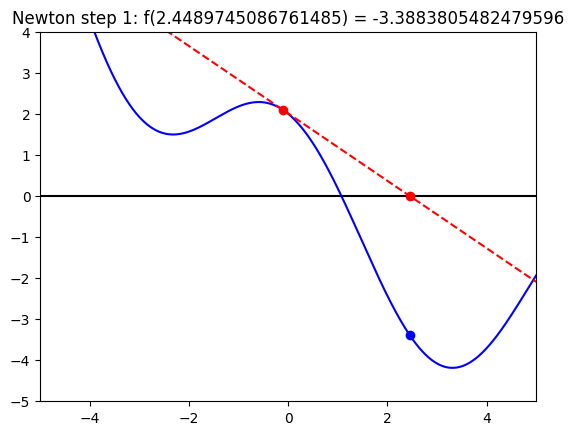

In [22]:
fig = figure()
xs = linspace(-5,5,1000)
@manipulate for step in slider(1:20, value=1), start in slider(-4:0.1:4, value=-0.1)
    withfig(fig) do
        x = start
        local xprev, f, f′
        for i = 1:step
            xprev = x
            f = 2cos(x) - x + x^2/10
            f′ = -2sin(x) - 1 + 2x/10
            x = x - f/f′
        end
        plot(xs, 0*xs, "k-")
        plot(xs, 2cos.(xs) - xs + xs.^2/10, "b-")
        newf = 2cos(x) - x + x^2/10
        plot([xprev, x], [f, 0.0], "ro")
        plot(x, newf, "bo")
        plot(xs, f + f′ * (xs - xprev), "r--")
        xlim(minimum(xs), maximum(xs))
        ylim(-5,4)
        title("Newton step $step: f($x) = $newf")
    end
end

If you start it anywhere near a root of $f(x)$, Newton's method can converge extremely quickly: **asymptotically, it doubles the number of accurate digits on each step**.

However, if you start it far from a root, the convergence can be hard to predict, and it may not even converge at all (it can oscillate forever around a local minimum).

Still, in many practical applications, there are ways to get a good initial guess for Newton, and then it is an extremely effective way to solve nonlinear equations to high accuracy.